In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from load import read_data, get_full_prepared_data_with_upsample
from processing import start_processing, retain_alnum
from parameters import RANDOM_SEED, SCORERS, TARGET_FEATURE
from preparing import MyOheHotEncoder, MyOrdinalEncoder, MyMinMaxScaler

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_info_columns', 1000)

In [2]:
%%time
df, ft, fp = get_full_prepared_data_with_upsample()

Wall time: 13.2 s


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20275 entries, 72716 to 69975
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   mean_mark                    20275 non-null  int32   
 1   status                       13584 non-null  float64 
 2   start_year_val               20275 non-null  int64   
 3   diff_between_school_n_start  20275 non-null  float64 
 4   mean_mark_add1               20275 non-null  float64 
 5   mean_mark_add2               20275 non-null  float64 
 6   start_year                   20275 non-null  category
 7   gender                       20275 non-null  category
 8   condition                    20275 non-null  category
 9   language                     20275 non-null  category
 10  school                       20275 non-null  category
 11  school_location              20275 non-null  category
 12  country                      20275 non-null  category
 1

In [4]:
def eval_freq(col, df=df):
    if len(df[col].unique()) > 20:
        return
    temp = pd.concat([df[col][df[TARGET_FEATURE] == 2].value_counts() / df[col].value_counts() * 100,
                      df[col][df[TARGET_FEATURE] == 1].value_counts() / df[col].value_counts() * 100,
                      df[col].value_counts()], axis=1, keys=['percent -1', 'percent 3', 'count'])
    temp.index.name = col
    display(temp)

for col in df.select_dtypes(include='category').columns:
    eval_freq(col)

,percent -1,percent 3,count
start_year,,,
0,0.139211,16.890951,2155
1,0.387347,25.500323,3098
2,0.692241,20.882607,3467
3,1.106383,20.368794,3525
4,2.245199,20.768095,3385
5,6.485741,26.586937,2174
6,8.811354,29.627439,1691
7,21.794872,43.974359,780


,percent -1,percent 3,count
gender,,,
0,4.217237,28.380532,8157
1,2.228090,19.854762,12118


,percent -1,percent 3,count
condition,,,
2,3.464505,28.069029,7649
3,3.652561,28.017817,6735
1,1.875442,13.871196,2826
0,1.560799,9.437387,2755
4,2.258065,11.290323,310


,percent -1,percent 3,count
language,,,
0,3.187149,23.776135,15688
1,3.026597,24.243351,3271
2,1.139818,15.045593,1316


,percent -1,percent 3,count
country,,,
0,5.071315,34.706815,631
1,0.000000,38.528139,231
2,2.894311,22.595476,19141
3,10.294118,32.352941,272


,percent -1,percent 3,count
region,,,
0,0.148810,25.148810,672
1,2.871622,29.729730,592
2,2.961210,21.906026,17324
3,5.084746,34.668721,649
4,4.081633,31.972789,147
5,0.000000,38.034188,234
6,3.738318,36.448598,107
7,4.332130,33.212996,277
8,10.256410,32.600733,273


,percent -1,percent 3,count
community,,,
0,2.861122,22.813014,15798
1,3.618495,24.949743,4477


,percent -1,percent 3,count
has_mother,,,
0,2.386443,24.165246,9973
1,3.649777,22.432537,10302


,percent -1,percent 3,count
has_father,,,
0,2.379286,24.122763,10003
1,3.660436,22.468847,10272


,percent -1,percent 3,count
relativies_country,,,
0,0.000000,33.823529,272
1,5.111402,31.454784,763
2,0.000000,37.229437,231
3,2.946682,22.519921,18699
4,7.741935,29.677419,310


,percent -1,percent 3,count
countryside,,,
0,3.214696,22.885572,15678
1,2.392865,24.646509,4597


,percent -1,percent 3,count
foreign,,,
0,2.835188,22.639110,18870
1,5.622776,31.957295,1405


,percent -1,percent 3,count
faculty,,,
0,5.820611,16.030534,1048
1,2.042711,18.477252,3231
2,1.921674,20.919484,4111
3,2.634055,38.570085,1063
4,2.049180,34.016393,976
5,8.359133,15.325077,646
6,2.328160,25.388027,902
7,5.225989,22.598870,1416
8,1.946472,15.815085,822


,percent -1,percent 3,count
mean_mark_type1,,,
1,2.950653,23.107795,17691
0,3.560372,24.496904,2584


,percent -1,percent 3,count
mean_mark_type2,,,
0,3.329894,27.999250,10661
1,3.529412,20.147059,4760
2,2.324455,16.368039,2065
4,1.523616,15.337735,1969
3,1.585366,16.707317,820


,percent -1,percent 3,count
school_type,,,
0,3.616637,22.332731,3318
1,1.785714,41.071429,224
2,3.506455,24.193075,6816
3,0.556399,16.388467,1977
4,2.560000,34.880000,1250
5,3.109118,22.107623,6690


,percent -1,percent 3,count
has_full_family,,,
0,2.378335,24.123114,10007
1,3.661862,22.467861,10268


,percent -1,percent 3,count
has_not_family,,,
0,3.648360,22.433534,10306
1,2.387401,24.164911,9969


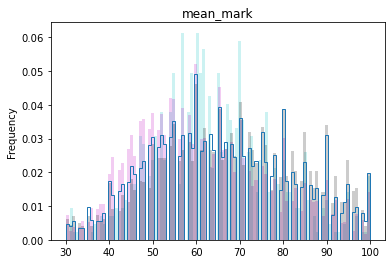

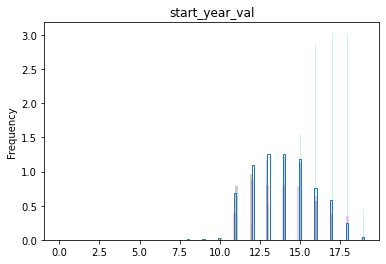

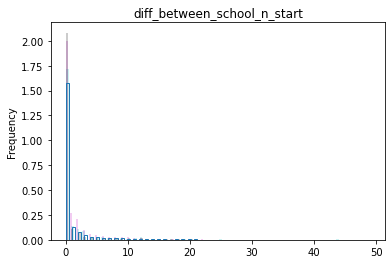

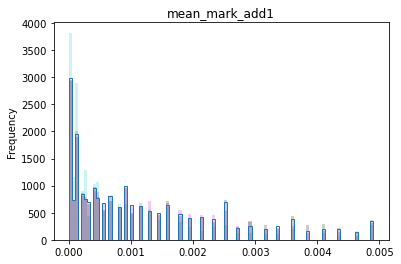

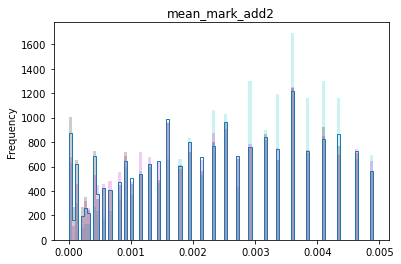

In [5]:
def hist(col, df=df):
    _, ax = plt.subplots()
    # kwargs = {bins=100, density=True, ax=ax, histtype='step'}
    kwargs = {'bins': 100, 'density': True, 'ax': ax, 'alpha': 0.2}
    df[df[TARGET_FEATURE] == 2][col].plot.hist(color='c', **kwargs)
    df[df[TARGET_FEATURE] == 1][col].plot.hist(color='m', **kwargs)
    df[df[TARGET_FEATURE] == 0][col].plot.hist(color='k', **kwargs)
    if any(df[TARGET_FEATURE].isna()):
        df[df[TARGET_FEATURE].isna()][col].plot.hist(bins=100, density=True, ax=ax, histtype='step')
    plt.title(col)

#df0 = MyMinMaxScaler().fit_transform(df.copy())
df0 = df.copy()
for col in df.select_dtypes(exclude='category'):
    if col != TARGET_FEATURE and 'random' not in col:
        hist(col, df0)

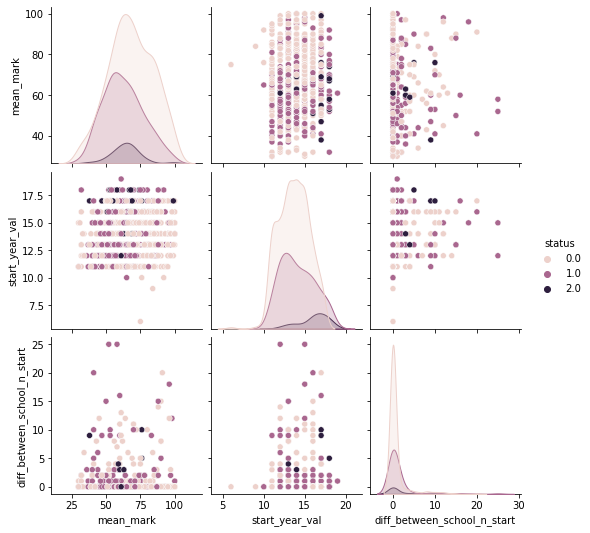

In [6]:
dfi = df.copy()
dfi = dfi.drop(columns=[x for x in dfi.columns if 'random' in x or 'scale_fun' in x or 'add' in x])
#dfi[TARGET_FEATURE] = dfi[TARGET_FEATURE].fillna(2).astype(int).astype('category')
sns.pairplot(dfi.sample(1000), hue=TARGET_FEATURE)